## For project development. To be deleted.

### data_prep.py

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from datasets import Dataset
import pickle

In [3]:
data = pd.read_csv('../hanna_stories_annotations.csv')
data.head()

,Story ID,Prompt,Human,Story,Model,Relevance,Coherence,Empathy,Surprise,Engagement,Complexity,Worker ID,Assignment ID,Work time in seconds,Name
0,0,When you die the afterlife is an arena where y...,"3,000 years have I been fighting. Every mornin...","3,000 years have I been fighting. Every mornin...",Human,4,4,3,2,4,4,A2VE5IV9OD2SK1,3X87C8JFVHIT235KQ4UTS8264I6SQJ,579.0,NaN
1,0,When you die the afterlife is an arena where y...,"3,000 years have I been fighting. Every mornin...","3,000 years have I been fighting. Every mornin...",Human,5,5,1,3,4,1,A1IZ4NX41GKU4X,3DR23U6WEGL5K0SU6D4J8W9EM9LTE7,82.0,none
2,0,When you die the afterlife is an arena where y...,"3,000 years have I been fighting. Every mornin...","3,000 years have I been fighting. Every mornin...",Human,2,2,3,2,2,3,A264NN7JBX4UDQ,3UJ1CZ6IZSW49HMM6C6QUX7F7UV5SA,273.0,none
3,1,A new law is enacted that erases soldiers memo...,"“Dad, you 're on TV again !” I heard Eric 's v...","“Dad, you 're on TV again !” I heard Eric 's v...",Human,5,5,3,4,4,4,A3CFNUD7VR2E1E,317HQ483IIZJ5SPW508YKC1EP6RINX,117.0,Eric
4,1,A new law is enacted that erases soldiers memo...,"“Dad, you 're on TV again !” I heard Eric 's v...","“Dad, you 're on TV again !” I heard Eric 's v...",Human,5,4,4,4,4,4,A2VE5IV9OD2SK1,3T3IWE1XGHUUH3IZF4ZJ2DYS57WQTT,751.0,Eric


In [98]:
# group data by first 5 columns and average metric columns
data_agg = data.groupby(data.columns[:5].tolist(), as_index=False).agg(
    #Relevance=('Relevance', 'mean'),
    Coherence=('Coherence', 'mean'),
    Empathy=('Empathy', 'mean'),
    Surprise=('Surprise', 'mean'),
    Engagement=('Engagement', 'mean'),
    Complexity=('Complexity', 'mean')
    )
data_agg.head()

,Story ID,Prompt,Human,Story,Model,Coherence,Empathy,Surprise,Engagement,Complexity
0,0,When you die the afterlife is an arena where y...,"3,000 years have I been fighting. Every mornin...","3,000 years have I been fighting. Every mornin...",Human,3.666667,2.333333,2.333333,3.333333,2.666667
1,1,A new law is enacted that erases soldiers memo...,"“Dad, you 're on TV again !” I heard Eric 's v...","“Dad, you 're on TV again !” I heard Eric 's v...",Human,4.666667,4.000000,3.666667,3.666667,4.000000
2,2,A scientific study proves that all humans have...,"When Tyler entered the ward, his daughter Vale...","When Tyler entered the ward, his daughter Vale...",Human,4.666667,4.000000,4.333333,4.000000,4.333333
3,3,Write a story about an elderly wizard and his ...,His body was failing. He had taken care of it ...,His body was failing. He had taken care of it ...,Human,4.000000,3.000000,2.000000,3.666667,4.000000
4,4,"You have become death, destroyer of worlds.","I saw the button. It was simple, red, no words...","I saw the button. It was simple, red, no words...",Human,5.000000,3.000000,4.666667,3.666667,3.666667


TODO:
- Consider not including Relevance beacause it's based on the story AND prompt 
- The final dataset should be a dictionary with three keys (train, validation, and test) each containg a dataset object. A dataset object contains a dictionary (with keys label and text) for each data entry.

In [99]:
metrics = ['Coherence', 'Empathy', 'Surprise', 'Engagement', 'Complexity']

In [41]:
# round scores to nearest integer
#data_agg_rounded = data_agg.copy()

#for metric in metrics:
#    data_agg_rounded[metric] = data_agg_rounded[metric].round()


In [ ]:
#data_agg_rounded.head()

In [108]:
# combine scores to single label
y = data_agg.iloc[:, 5:10]

# isolate stories
X = data_agg.iloc[:, 3]

# train test split - no stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [114]:
# val test split
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=55)

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

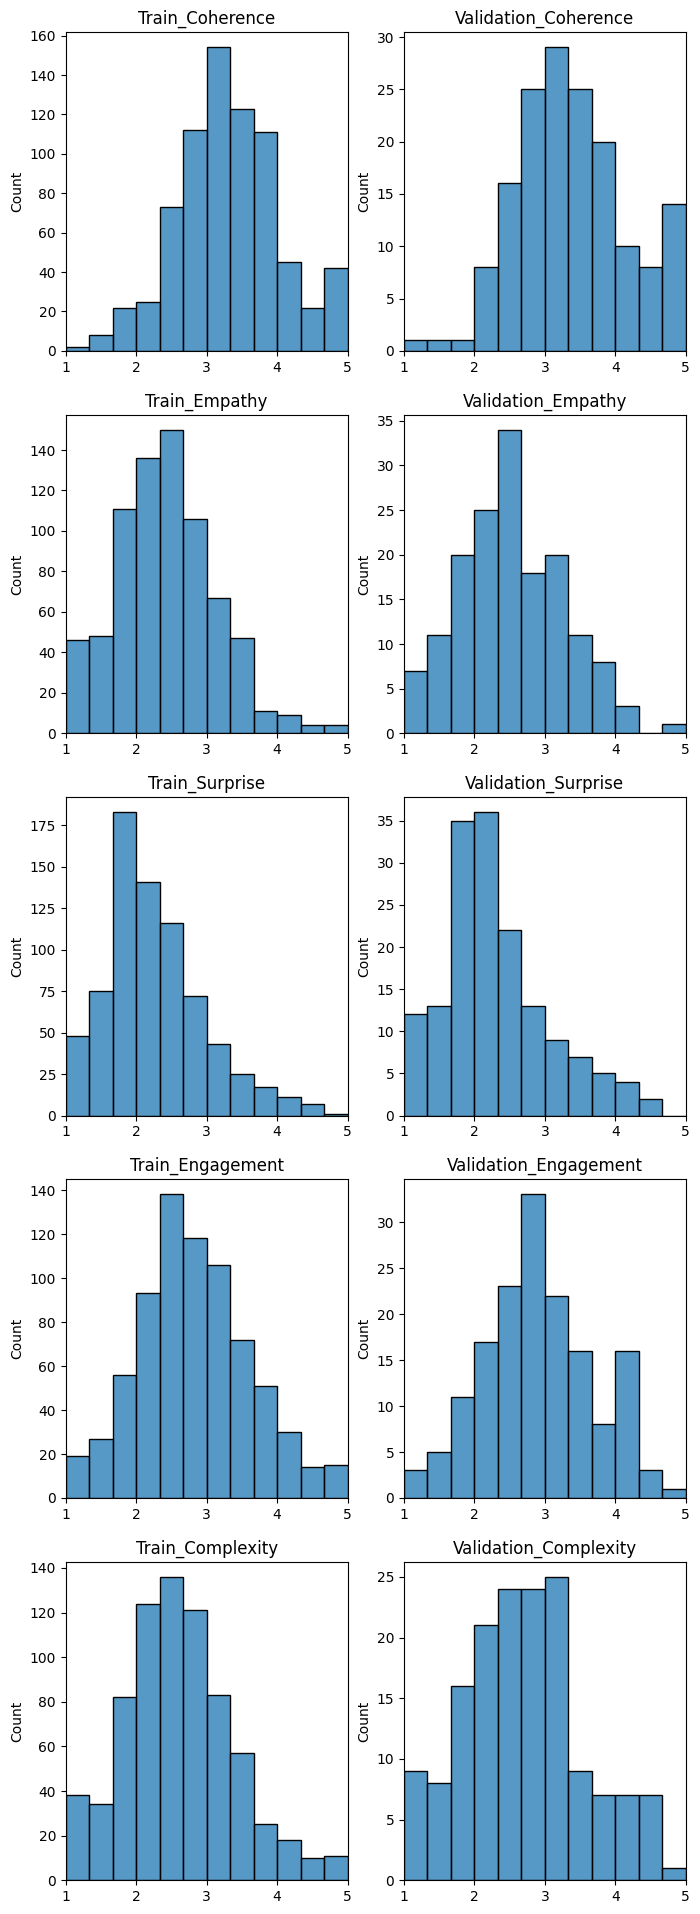

In [144]:
# plot distribution of scores in train and validation sets for each metric
fig, ax = plt.subplots(5, 2, figsize=(8, 24))
for i, metric in enumerate(metrics):
    sns.histplot(y_train[metric], bins=np.arange(0, 5+(1/3), 1/3), ax=ax[i, 0]).set(xlabel=None)
    sns.histplot(y_val[metric], bins=np.arange(0, 5+(1/3), 1/3), ax=ax[i, 1]).set(xlabel=None)
    ax[i, 0].set_title(f'Train_{metric}')
    ax[i, 0].set_xlim(1, 5)
    ax[i, 1].set_title(f'Validation_{metric}')
    ax[i, 1].set_xlim(1, 5)
plt.show()

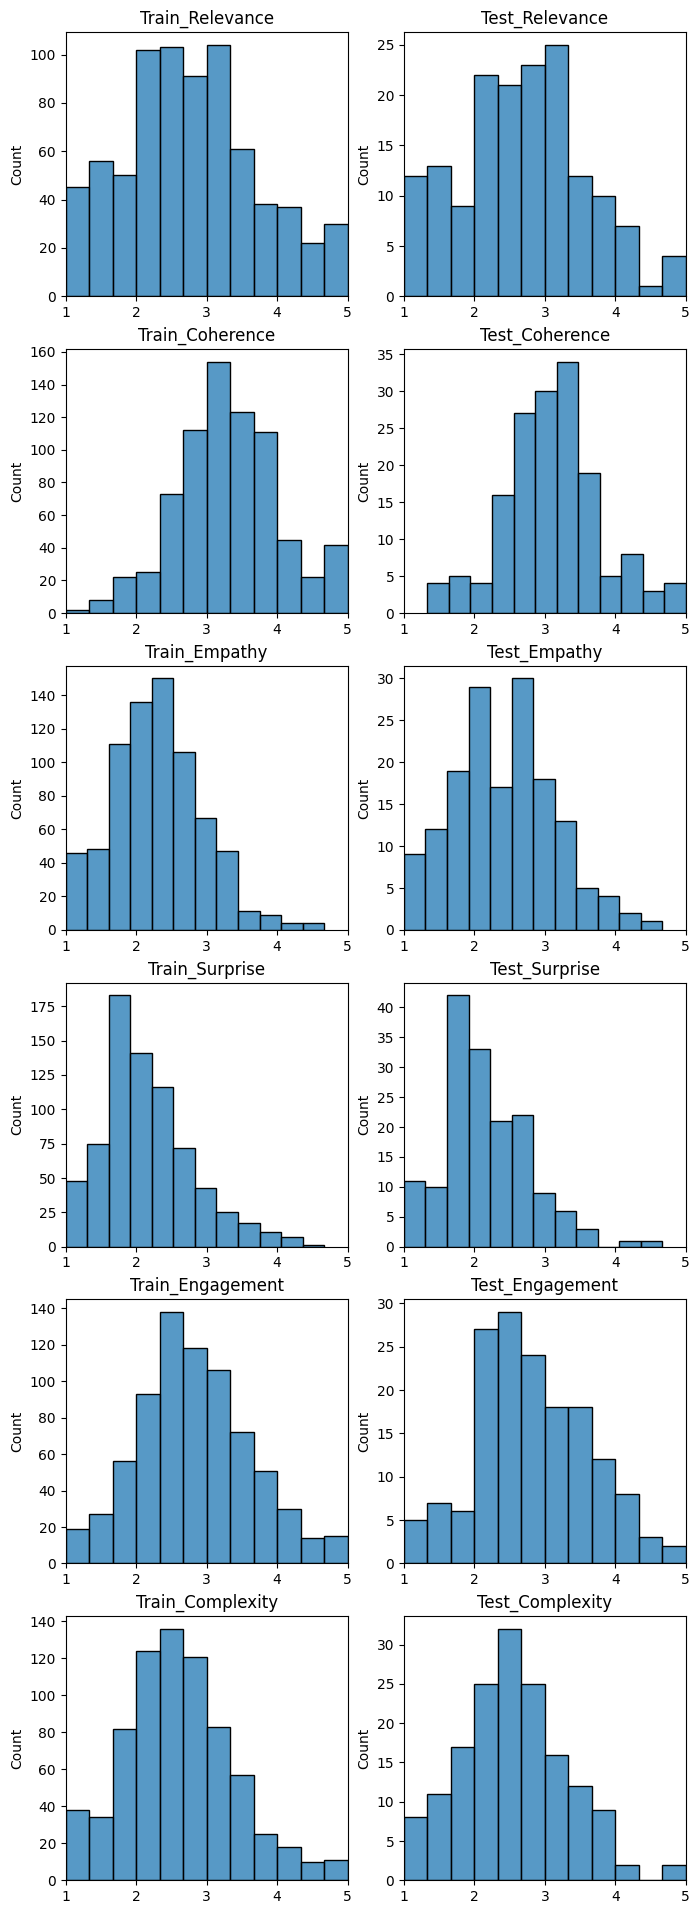

In [87]:
# plot distribution of scores in train and test sets for each metric
fig, ax = plt.subplots(6, 2, figsize=(8, 24))
for i, metric in enumerate(metrics):
    sns.histplot([score[i] for score in y_train], bins=12, ax=ax[i, 0])
    sns.histplot([score[i] for score in y_test], bins=12, ax=ax[i, 1])
    ax[i, 0].set_title(f'Train_{metric}')
    ax[i, 0].set_xlim(1, 5)
    ax[i, 1].set_title(f'Test_{metric}')
    ax[i, 1].set_xlim(1, 5)
plt.show()

In [146]:
train = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)
train

,Story,Coherence,Empathy,Surprise,Engagement,Complexity
0,"Beep, beep, beep, beep. I took the knife from ...",3.333333,3.333333,2.666667,3.333333,3.333333
1,"In the only song I can think of, it’s *Lonelie...",3.000000,2.333333,2.000000,2.666667,1.666667
2,"“ok, so this is a good time to get started.” i...",1.666667,1.000000,1.000000,1.000000,1.000000
3,sometimes i wake up to the sound of glass brea...,2.666667,2.666667,1.666667,2.000000,2.000000
4,'Dad? Dad? Dad! Get up!'I shouted as the redne...,3.333333,2.666667,2.000000,2.666667,2.666667
...,...,...,...,...,...,...
734,opens almost a month after the start of Star T...,3.666667,2.333333,3.000000,3.000000,2.333333
735,Torsons were one of the least remarked off spe...,2.666667,1.333333,2.000000,2.000000,2.000000
736,She likes this part of the convent. It was qui...,4.333333,3.333333,2.666667,3.666667,4.000000
737,"As I push my feet in front of the lightbulb, I...",3.333333,2.333333,1.333333,3.000000,2.333333


In [66]:
train_dict = {'label': y_train, 'story': X_train}
ds_train = Dataset.from_dict(train_dict)
test_dict = {'label': y_test, 'story': X_test}
ds_test = Dataset.from_dict(test_dict)
val_dict = {'label': y_val, 'story': X_val}
ds_val = Dataset.from_dict(val_dict)

dataset = {'train': ds_train, 'test': ds_test, 'validation': ds_val}

In [71]:
# save dataset as pkl file
with open('../story_eval_dataset.pkl', 'wb') as f:
    pickle.dump(dataset, f)

In [97]:
print(len(dataset['train']), len(dataset['test']), len(dataset['validation']))

739 159 158


### fine_tune.py

Medium. Regression with text input: https://lajavaness.medium.com/regression-with-text-input-using-bert-and-transformers-71c155034b13 

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import mean_squared_error
import torch

In [ ]:
BASE_MODEL = 'distilbert-base-uncased'
LEARNING_RATE = 2e-5
MAX_LENGTH = 256
BATCH_SIZE = 16
EPOCHS = 20

tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
model = AutoModelForSequenceClassification.from_pretrained(BASE_MODEL, problem_type='regression')

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    rmse = mean_squared_error(labels, predictions, squared=False)
    return {"rmse": rmse}

# alternative
#metric = load("mse")
#def compute_metrics(eval_pred):
#    predictions, labels = eval_pred
#    return metric.compute(predictions=predictions, references=labels)

In [ ]:
training_args = TrainingArguments(
    output_dir="../models/camembert-fine-tuned-regression-2",
    learning_rate=LEARNING_RATE,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=EPOCHS,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=2,
    metric_for_best_model="accuracy",
    load_best_model_at_end=True,
    weight_decay=0.01,
)

In [ ]:
# You can replace the loss with any custom loss function you employ:

class RegressionTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs[0][:, 0]
        loss = torch.nn.functional.mse_loss(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [ ]:
trainer = RegressionTrainer(
    model=model,
    args=training_args,
    train_dataset=ds["train"],
    eval_dataset=ds["validation"],
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

In [ ]:
# evaluate model on test set
trainer.eval_dataset=ds["test"]
trainer.evaluate()

Towards AI, transformers for multi-regression: https://towardsai.net/p/l/transformers-for-multi-regression-part2

In [ ]:
import torch
import torch.nn as nn

import transformers
from transformers import (
    AutoModel, AutoConfig, 
    AutoTokenizer, logging,
    AdamW, get_linear_schedule_with_warmup,
    DataCollatorWithPadding,
    Trainer, TrainingArguments
)

from transformers.modeling_outputs import SequenceClassifierOutput

In [ ]:
CONFIG = {
    "model_name": "microsoft/deberta-v3-base",# "distilbert-base-uncased",
    "device": 'cuda' if torch.cuda.is_available() else 'cpu',
    "dropout": random.uniform(0.01, 0.60),
    "max_length": 512,
    "train_batch_size": 8,
    "valid_batch_size": 16,
    "epochs": 10,
    "folds" : 3,
    "max_grad_norm": 1000,
    "weight_decay": 1e-6,
    "learning_rate": 1e-5,
     "loss_type": "rmse",
    "n_accumulate" : 1,
    "label_cols" : ['Coherence', 'Empathy', 'Surprise', 'Engagement', 'Complexity'], 
    
}

In [ ]:
# Here the model is constructed, I think

class FeedBackModel(nn.Module):
    def __init__(self, model_name):
        super(FeedBackModel, self).__init__()
        self.config = AutoConfig.from_pretrained(model_name)
        self.config.hidden_dropout_prob = 0
        self.config.attention_probs_dropout_prob = 0
        self.model = AutoModelForSequenceClassification.from_pretrained(model_name, problem_type = "regression", config=self.config)
        self.drop = nn.Dropout(p=0.2)
        #self.pooler = MeanPooling()
        self.fc = nn.Linear(self.config.hidden_size, len(CONFIG['label_cols']))
        
    def forward(self, input_ids, attention_mask):
        out = self.model(input_ids=input_ids,
                         attention_mask=attention_mask, 
                         output_hidden_states=False)
        out = self.pooler(out.last_hidden_state, attention_mask)
        out = self.drop(out)
        outputs = self.fc(out)
        return SequenceClassifierOutput(logits=outputs)

In [ ]:
# defining the loss function to feed into the trainer

class RMSELoss(nn.Module):
    """
    Code taken from Y Nakama's notebook (https://www.kaggle.com/code/yasufuminakama/fb3-deberta-v3-base-baseline-train)
    """
    def __init__(self, reduction='mean', eps=1e-9):
        super().__init__()
        self.mse = nn.MSELoss(reduction='none')
        self.reduction = reduction
        self.eps = eps

    def forward(self, predictions, targets):
        loss = torch.sqrt(self.mse(predictions, targets) + self.eps)
        if self.reduction == 'none':
            loss = loss
        elif self.reduction == 'sum':
            loss = loss.sum()
        elif self.reduction == 'mean':
            loss = loss.mean()
        return loss

In [ ]:
# make a trainer class that uses RMSE loss

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        outputs = model(inputs['input_ids'], inputs['attention_mask'])
        loss_func = RMSELoss(reduction='mean')
        loss = loss_func(outputs.logits.float(), inputs['labels'].float()) # predictions, targets
        return (loss, outputs) if return_outputs else loss

In [ ]:
# a custom function that allows calculating the RMSE of each of the six metrics separately

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    colwise_rmse = np.sqrt(np.mean((labels - predictions) ** 2, axis=0))
    res = {
        f"{analytic.upper()}_RMSE" : colwise_rmse[i]
        for i, analytic in enumerate(CONFIG["label_cols"])
    }
    res["MCRMSE"] = np.mean(colwise_rmse)
    return res

In [ ]:
training_args = TrainingArguments(
        output_dir=f"outputs-{fold}/",
        evaluation_strategy="epoch",
        per_device_train_batch_size=CONFIG['train_batch_size'],
        per_device_eval_batch_size=CONFIG['valid_batch_size'],
        num_train_epochs=CONFIG['epochs'],
        learning_rate=CONFIG['learning_rate'],
        weight_decay=CONFIG['weight_decay'],
        gradient_accumulation_steps=CONFIG['n_accumulate'],
        seed=SEED,
        group_by_length=True,
        max_grad_norm=CONFIG['max_grad_norm'],
        metric_for_best_model='eval_MCRMSE',
        load_best_model_at_end=True,
        greater_is_better=False,
        save_strategy="epoch",
        save_total_limit=1,
        report_to="wandb",
        label_names=["labels"]
    )

In [ ]:
# data collator for dynamic padding
collate_fn = DataCollatorWithPadding(tokenizer=tokenizer)

# init model
model = FeedBackModel(CONFIG['model_name'])

# SET THE OPITMIZER AND THE SCHEDULER
# no decay for bias and normalization layers
param_optimizer = list(model.named_parameters())
no_decay = ["bias", "LayerNorm.weight"]
optimizer_parameters = [
{
        "params": [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], # get all the params except those in no_decay
        "weight_decay": CONFIG['weight_decay'],
},
{
        "params": [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], # get all the params that are in no_decay
        "weight_decay": 0.0,
},
]
optimizer = AdamW(optimizer_parameters, lr=CONFIG['learning_rate'])
num_training_steps = (len(dataset['train']) * CONFIG['epochs']) // (CONFIG['train_batch_size'] * CONFIG['n_accumulate'])
scheduler = get_linear_schedule_with_warmup(
optimizer,
num_warmup_steps=0.1*num_training_steps,
num_training_steps=num_training_steps
)

trainer = CustomTrainer(
        model=model,
        args=training_args,
        train_dataset=dataset['train'],
        eval_dataset=dataset['validation'],
        data_collator=collate_fn,
        optimizers=(optimizer, scheduler),
        compute_metrics=compute_metrics)

In [ ]:
trainer.train()

In [ ]:
# lets define the batch genetator
class CustomIterator(torch.utils.data.Dataset):
    def __init__(self, df, tokenizer, labels=CONFIG['label_cols'], is_train=True):
        self.df = df
        self.tokenizer = tokenizer
        self.max_seq_length = CONFIG["max_length"]# tokenizer.model_max_length
        self.labels = labels
        self.is_train = is_train
        
    def __getitem__(self,idx):
        tokens = self.tokenizer(
                    self.df.loc[idx, 'full_text'],#.to_list(),
                    add_special_tokens=True,
                    padding='max_length',
                    max_length=self.max_seq_length,
                    truncation=True,
                    return_tensors='pt',
                    return_attention_mask=True
                )     
        res = {
            'input_ids': tokens['input_ids'].to(CONFIG.get('device')).squeeze(),
            'attention_mask': tokens['attention_mask'].to(CONFIG.get('device')).squeeze()
        }
        
        if self.is_train:
            res["labels"] = torch.tensor(
                self.df.loc[idx, self.labels].to_list(), 
            ).to(CONFIG.get('device')) 
            
        return res
    
    def __len__(self):
        return len(self.df)